In [1]:
# LOF starts by estimating the local density around each data point.
# A lower distance indicates higher density.[inlier]
# lower density than its neighbors, it is likely an [outlier].

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [3]:
data = pd.read_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\DMPA_CCEB_38_57_62\\cleaned_data_1.csv")
data.head(5)

,id,line_item_quantity,unit_price,pack_price,line_item_value,line_item_insurance,sub_classification,dosage,weight
0,3,1000,0.03,6.20,6200.0,240.117626,Pediatric,10mg/ml,358
1,15,31920,0.07,3.99,127360.8,240.117626,Adult,150mg,1855
2,16,38000,0.05,3.20,121600.0,240.117626,Adult,30mg,7590
3,23,416,0.02,5.35,2225.6,240.117626,Pediatric,10mg/ml,504
4,44,135,0.36,32.40,4374.0,240.117626,Pediatric,200mg,328


In [4]:
features = ['line_item_quantity', 'line_item_value']
X = data[features]

In [5]:
scaler = StandardScaler() # used for scaling the values it is used to standardize and normalize

X_scaled = scaler.fit_transform(X)
# it is used to fit the values fit-mean and sd for x,transform-subtracts the mean and divide by sd

In [6]:
#n_neighbours-consider the nearest values for local density 
# contamination is the proportion of data [expect 5% of your data to be outliers]
lof = LocalOutlierFactor(n_neighbors=15, contamination=0.05)

y_pred = lof.fit_predict(X_scaled)

is_anomaly = y_pred == -1 #boolean array


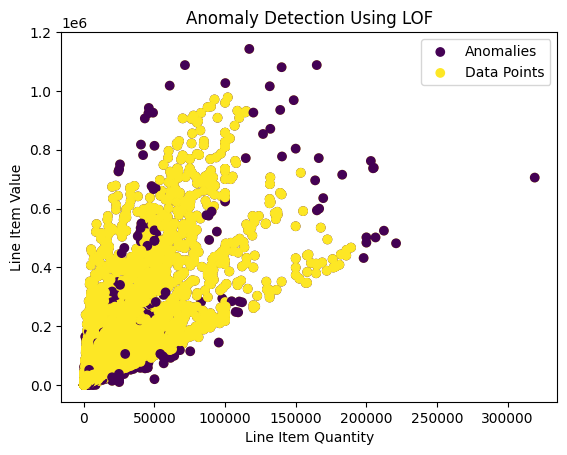

In [7]:
plt.scatter(X['line_item_quantity'], X['line_item_value'], c=is_anomaly, cmap='viridis', label='Anomalies')
plt.scatter(X['line_item_quantity'], X['line_item_value'], c=np.logical_not(is_anomaly), cmap='viridis', label='Data Points')
plt.xlabel('Line Item Quantity')
plt.ylabel('Line Item Value')
plt.title('Anomaly Detection Using LOF')
plt.legend(loc='upper right')
plt.show()


In [8]:
anomalies = data[is_anomaly]
print("Anomalies:",anomalies)

Anomalies:          id  line_item_quantity  unit_price  pack_price  line_item_value  \
16      161               64000        0.03        1.55         99200.00   
31      637               42000        0.02        1.45         60900.00   
34      719               25000        0.03        0.39          9750.00   
72     1179                   8        0.23       76.72           613.76   
82     1283               95500        0.03        1.51        144205.00   
...     ...                 ...         ...         ...              ...   
7830  86758              120000        0.13        7.72        926400.00   
7834  86782               24871        0.01        1.51         37555.21   
7854  86809               29287        0.06        3.60        105433.20   
7860  86817              205243        0.06        3.60        738874.80   
7861  86818              166571        0.06        3.60        599655.60   

      line_item_insurance sub_classification         dosage  \
16           

In [9]:
# Count the number of 1s (inliers) and -1s (outliers) in y_pred
num_inliers = np.sum(y_pred == 1)
num_outliers = np.sum(y_pred == -1)

print("Number of inliers (label 1):", num_inliers)
print("Number of outliers (label -1):", num_outliers)


Number of inliers (label 1): 7471
Number of outliers (label -1): 394


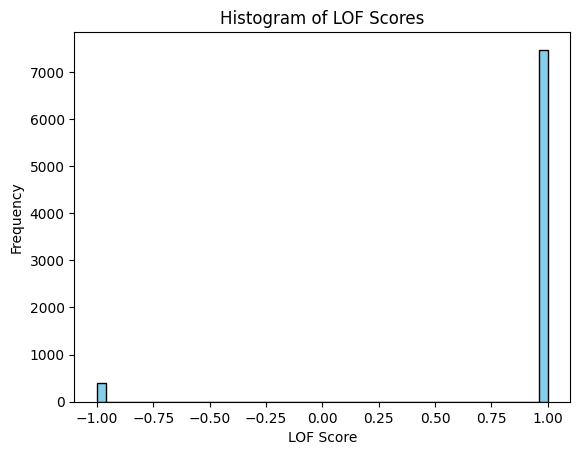

In [10]:
plt.hist(y_pred, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('LOF Score')
plt.ylabel('Frequency')
plt.title('Histogram of LOF Scores')
plt.show()

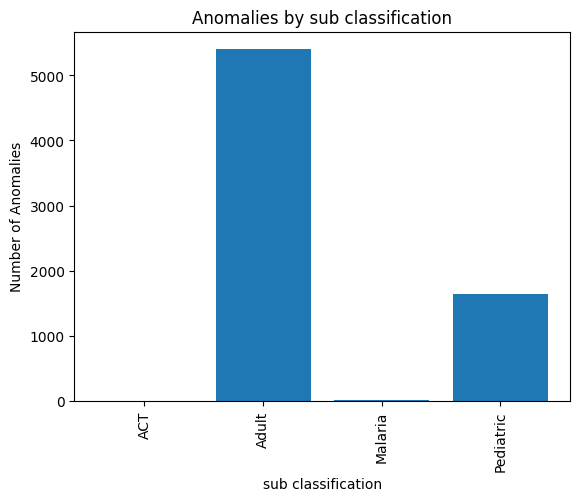

In [11]:
data['Anomaly'] = y_pred  # Assuming y_pred contains anomaly labels
anomaly_counts = data.groupby('sub_classification')['Anomaly'].sum().reset_index()
plt.bar(anomaly_counts['sub_classification'], anomaly_counts['Anomaly'])
plt.xlabel('sub classification')
plt.ylabel('Number of Anomalies')
plt.title('Anomalies by sub classification')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.show()


In [12]:
# Evaluate precision, recall, F1 score, and accuracy (if you have true labels for anomalies)
true_labels = np.where(y_pred == -1, 1, 0)  # Use LOF predictions as true labels for simplicity
predicted_labels = np.where(y_pred == -1, 1, 0)

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Precision, Recall, F1 Score, and Accuracy
precision = precision_score(true_labels, predicted_labels, zero_division=1)
recall = recall_score(true_labels, predicted_labels, zero_division=1)
f1 = f1_score(true_labels, predicted_labels, zero_division=1)
accuracy = accuracy_score(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[7471    0]
 [   0  394]]
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Accuracy: 1.00


In [13]:
# Print indices of outliers
outlier_indices = np.where(y_pred == -1)[0]
print("Indices of outliers:", outlier_indices)

# Print details of outliers
outliers = data.iloc[outlier_indices]
print("Details of outliers:")
print(outliers)

Indices of outliers: [  16   31   34   72   82   85   97  106  114  118  169  178  195  197
  207  211  233  247  265  325  335  344  349  355  373  386  394  406
  409  421  425  434  453  475  486  508  528  543  553  557  559  610
  615  628  638  670  693  708  745  781  800  839  856  859  860  861
  907  915  919  958  966  989 1018 1036 1038 1067 1078 1089 1110 1114
 1115 1119 1132 1150 1151 1158 1210 1221 1229 1278 1298 1311 1338 1371
 1403 1448 1463 1464 1486 1509 1515 1520 1521 1531 1535 1539 1546 1583
 1641 1651 1652 1675 1683 1716 1735 1745 1746 1747 1749 1755 1804 1805
 1813 1862 1877 1888 1901 1908 1939 2020 2030 2046 2106 2139 2140 2143
 2157 2175 2182 2226 2275 2320 2324 2398 2437 2446 2464 2472 2486 2491
 2497 2509 2510 2522 2543 2561 2598 2644 2700 2707 2712 2759 2766 2770
 2772 2807 2831 2837 2871 2950 2960 2965 3009 3037 3071 3077 3125 3149
 3156 3190 3202 3207 3229 3270 3283 3295 3296 3312 3330 3335 3356 3358
 3376 3378 3450 3466 3472 3475 3481 3509 3520 3556 3558 